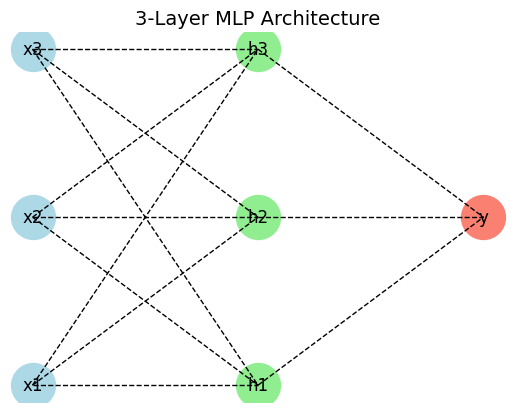

In [1]:
import matplotlib.pyplot as plt

def draw_mlp():
    fig, ax = plt.subplots()

    # Input layer
    input_neurons = ['x1', 'x2', 'x3']
    hidden_neurons = ['h1', 'h2', 'h3']
    output_neurons = ['y']

    for i, neuron in enumerate(input_neurons):
        ax.scatter(0, i, s=1000, color='lightblue')
        ax.text(0, i, neuron, ha='center', va='center', fontsize=12)

    for i, neuron in enumerate(hidden_neurons):
        ax.scatter(2, i, s=1000, color='lightgreen')
        ax.text(2, i, neuron, ha='center', va='center', fontsize=12)

    ax.scatter(4, 1, s=1000, color='salmon')
    ax.text(4, 1, 'y', ha='center', va='center', fontsize=12)

    # Draw connections
    for i in range(3):
        for j in range(3):
            ax.plot([0, 2], [i, j], 'k--', lw=1)

    for j in range(3):
        ax.plot([2, 4], [j, 1], 'k--', lw=1)

    ax.axis('off')
    plt.title("3-Layer MLP Architecture", fontsize=14)
    plt.show()

draw_mlp()


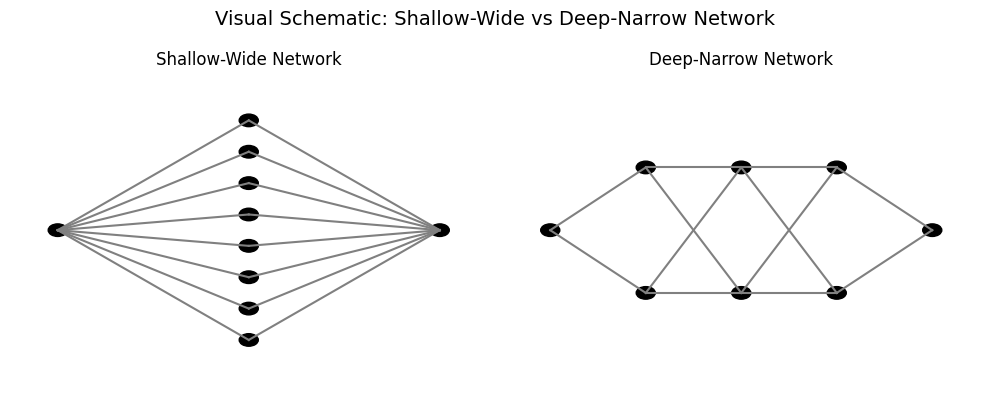

In [2]:
import matplotlib.pyplot as plt

def draw_neural_network(ax, layer_sizes, left=0.1, right=0.9, bottom=0.1, top=0.9, title=""):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(n_layers - 1)

    # Nodes
    for i, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2.0 + (top + bottom) / 2.0
        for j in range(layer_size):
            circle = plt.Circle((left + i * h_spacing, layer_top - j * v_spacing), 0.02, color='black', fill=True)
            ax.add_artist(circle)

    # Edges
    for i, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2.0 + (top + bottom) / 2.0
        layer_top_b = v_spacing * (layer_size_b - 1) / 2.0 + (top + bottom) / 2.0
        for j in range(layer_size_a):
            for k in range(layer_size_b):
                line = plt.Line2D(
                    [left + i * h_spacing, left + (i + 1) * h_spacing],
                    [layer_top_a - j * v_spacing, layer_top_b - k * v_spacing],
                    c='gray'
                )
                ax.add_artist(line)

    ax.set_title(title)
    ax.axis('off')

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Shallow-Wide: 1 hidden layer, 8 neurons
draw_neural_network(axes[0], [1, 8, 1], title="Shallow-Wide Network")

# Deep-Narrow: 3 hidden layers, 2 neurons each
draw_neural_network(axes[1], [1, 2, 2, 2, 1], title="Deep-Narrow Network")

plt.suptitle("Visual Schematic: Shallow-Wide vs Deep-Narrow Network", fontsize=14)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


   Depth  Width  Train Accuracy  Validation Accuracy
0      1     32        0.991649             0.975000
1      1     64        0.997216             0.977778
2      1    128        1.000000             0.980556
3      2     32        0.997912             0.975000
4      2     64        1.000000             0.966667
5      2    128        1.000000             0.977778
6      4     32        0.999304             0.952778
7      4     64        1.000000             0.975000
8      4    128        1.000000             0.975000


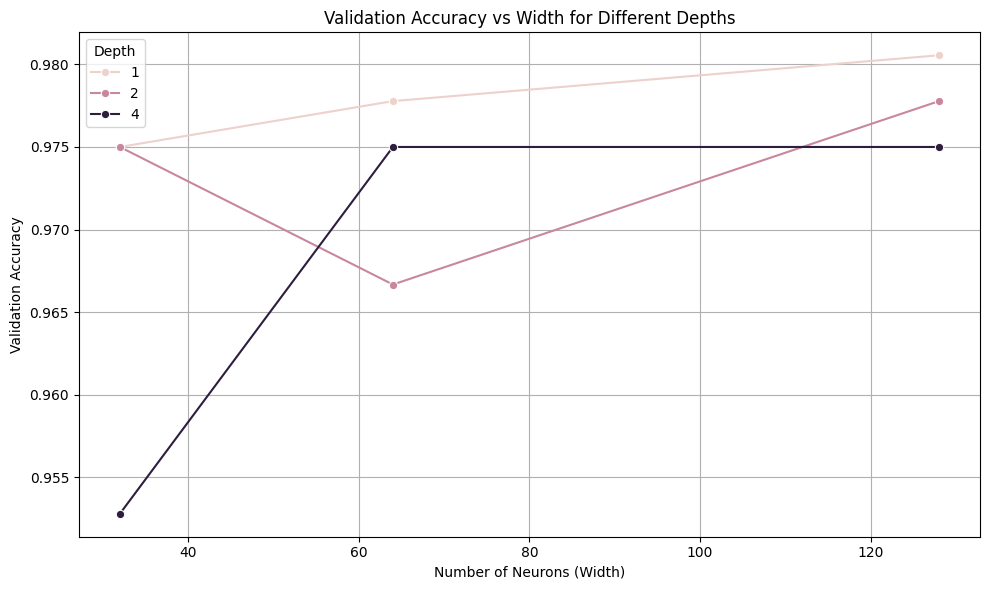

In [3]:
# Install dependencies if running in a new environment
# !pip install tensorflow scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load and preprocess the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = to_categorical(digits.target)

# Normalize features
X = StandardScaler().fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter grid
depths = [1, 2, 4]
widths = [32, 64, 128]
results = []

# Loop through combinations of depth and width
for depth in depths:
    for width in widths:
        # Build model
        model = Sequential()
        model.add(Dense(width, input_shape=(64,), activation='relu'))
        for _ in range(depth - 1):
            model.add(Dense(width, activation='relu'))
        model.add(Dense(10, activation='softmax'))  # 10 classes

        # Compile and train
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                            epochs=20, batch_size=32, verbose=0)

        # Store results
        results.append({
            'Depth': depth,
            'Width': width,
            'Train Accuracy': history.history['accuracy'][-1],
            'Validation Accuracy': history.history['val_accuracy'][-1]
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Plot results
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='Width', y='Validation Accuracy', hue='Depth', marker='o')
plt.title('Validation Accuracy vs Width for Different Depths')
plt.xlabel('Number of Neurons (Width)')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()


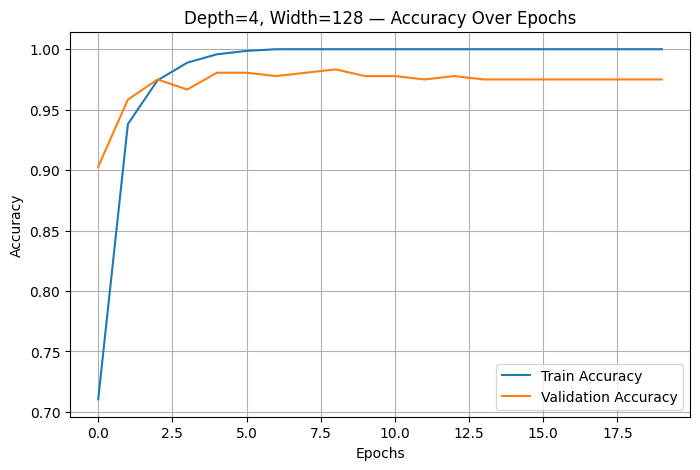

In [7]:
# Plot accuracy curves
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'Depth={depth}, Width={width} — Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


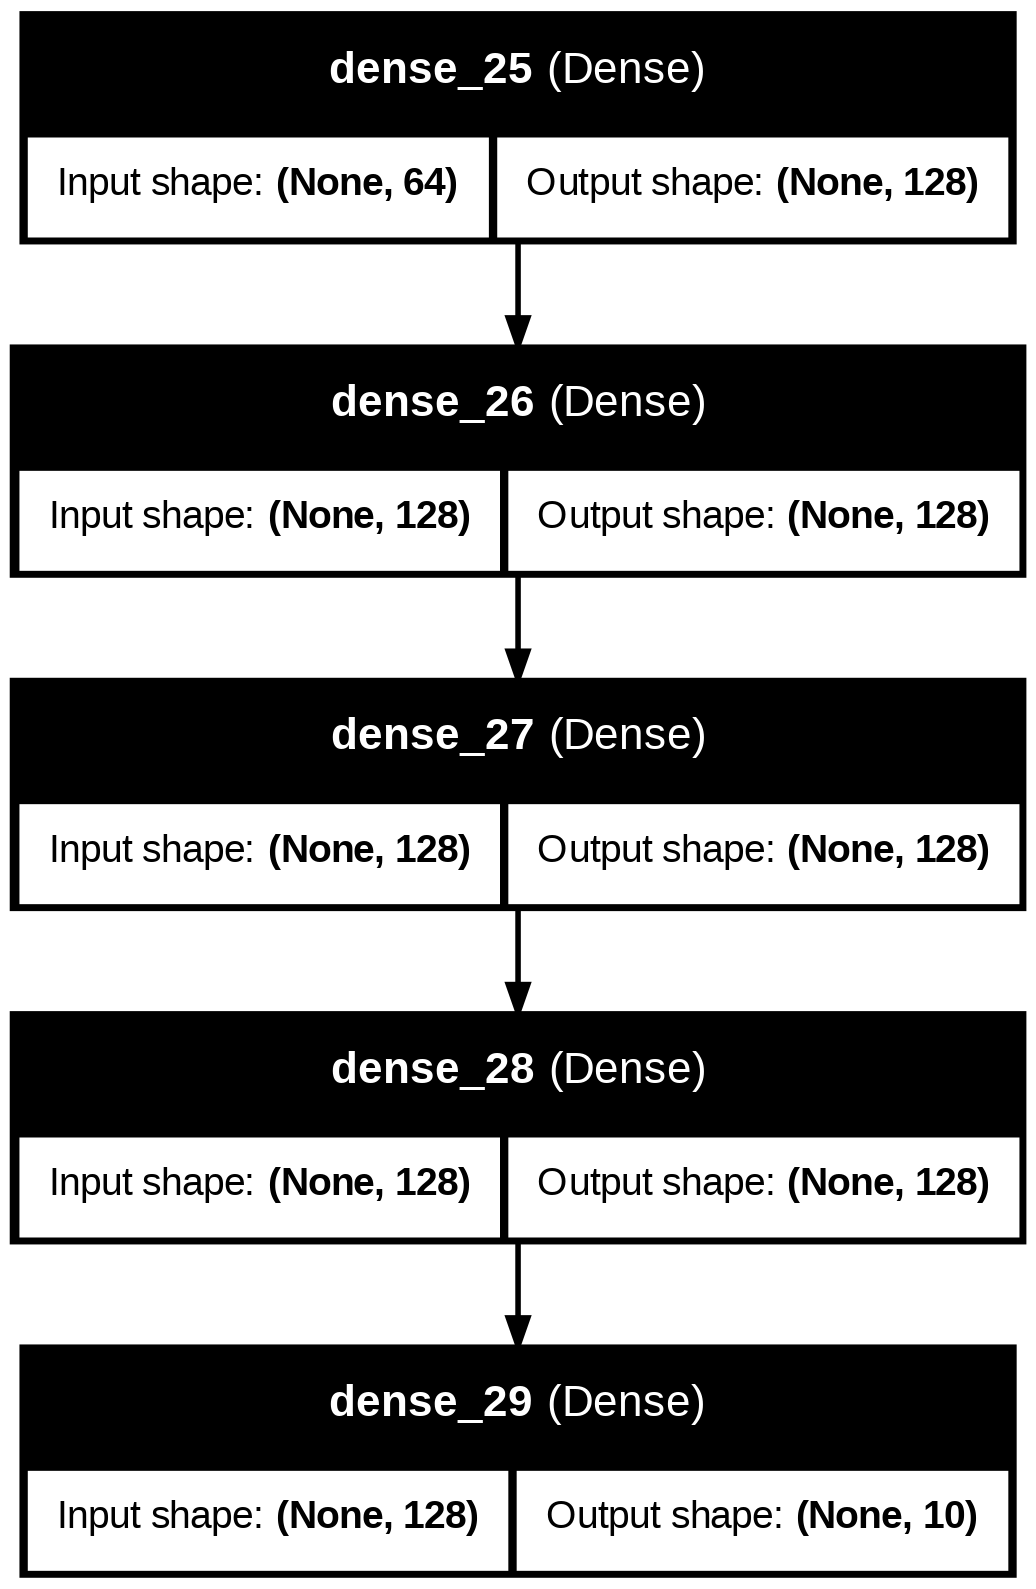

In [4]:
from tensorflow.keras.utils import plot_model

# Save diagram to file
plot_model(model, to_file=f'mlp_depth{depth}_width{width}.png', show_shapes=True, show_layer_names=True)


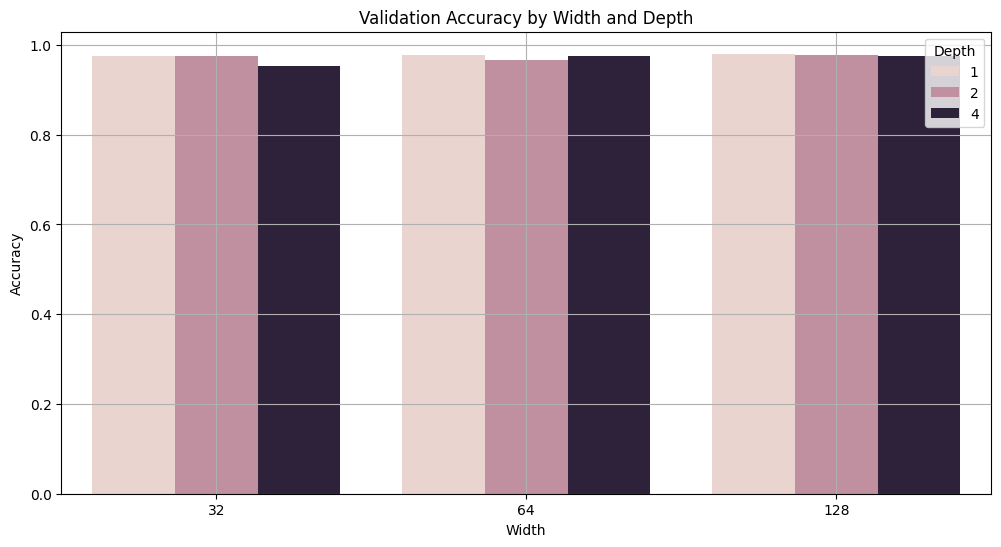

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Width', y='Validation Accuracy', hue='Depth', data=results_df)
plt.title('Validation Accuracy by Width and Depth')
plt.ylabel('Accuracy')
plt.xlabel('Width')
plt.grid(True)
plt.show()


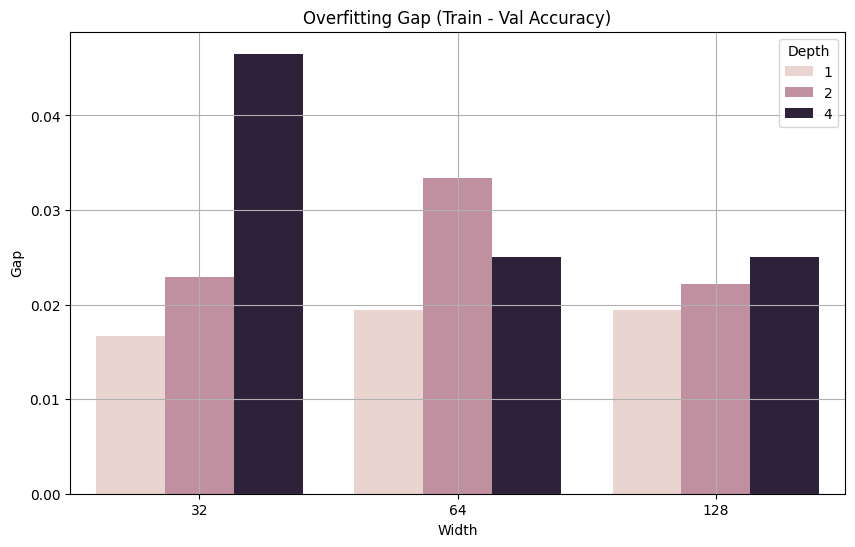

In [5]:
results_df['Overfit Gap'] = results_df['Train Accuracy'] - results_df['Validation Accuracy']

plt.figure(figsize=(10, 6))
sns.barplot(x='Width', y='Overfit Gap', hue='Depth', data=results_df)
plt.title('Overfitting Gap (Train - Val Accuracy)')
plt.ylabel('Gap')
plt.xlabel('Width')
plt.grid(True)
plt.show()
